Steps for environment setup
python -m venv howto  ->for virtual environment
pip install llm-azure,dotenv,langchain-openai,langchain-google-firestore,networkx ,langchain-huggingface,sentence_transformers,faiss-cpu#faiss-gpu




Prompting is the process of of providing specific instructions to a gen AI tool to receive new information or to achieve a desired outcome on a task


PROMPT ENGINEERING:
Role – Tell the AI who to be so it knows how to think.
Task – Say exactly what you want it to do.
Context – Give any info the AI needs to avoid guessing.
Format – Tell it how the answer should look.
Constraints – Set limits (length, tone, style).
Examples – Show a mini sample of what “good” looks like.

Example :
“You are a senior mobile engineer (Role). Explain how push notifications work (Task). Our app uses Firebase (Context). Give the answer in 3 bullets (Format). Keep it simple (Constraint). Example style: ‘Explain it like you’re teaching a new intern.’ (Example).”

BAD Prompt Example:
Explain LLM stuff clearly and also tell me how to optimize it. Keep it simple but also detailed. And also give examples but not too long. Make it professional sometimes and casual sometimes. Also talk about prompts and maybe embeddings or something if needed.

STRUCTURED prompt following the above template:

You are an AI tutor who explains technical AI concepts to beginners with simple language and clear analogies.[ROLE]  
Explain the concept of Retrieval-Augmented Generation (RAG) and its benefits.[TASK]  
The reader is a beginner software engineer who has used ChatGPT but has never implemented RAG.  [CONTEXT]  
They need a short explanation they can share with their team during a project kickoff.[CONTEXT]  

[FORMAT]  
Provide the output in the following structure:  
1. Definition (2–3 sentences)  
2. How it works (bullet points)  
3. Benefits (3–4 bullet points)  
4. One short practical example

Here is an example of the style and clarity I want:  [REFERENCE / EXAMPLE] 
“LLMs are like chefs, and the prompt is a recipe. Better recipes lead to better dishes.”  
Follow this type of simplicity and analogy style.

[EVALUATE]  
Before giving the final answer, briefly check:  
- Is the explanation beginner-friendly?  
- Does it avoid jargon?  
- Is it concise and clear?

[ITERATE]  
If the explanation is too technical, rewrite it using simpler language.


Limits of Chat-Based Usage
->No automation — You have to manually type every request; you can't run workflows or integrate LLMs into systems.
->No consistent structure — Chat responses can vary, while APIs let you enforce strict formats (JSON, schemas, etc.).
->Limited scalability — A chat session only serves one person, but an API can power apps for thousands of users.
->No data pipeline access — Chat can’t directly read your databases, files, or services, while APIs can process data programmatically.

How LLMs Measure Text (Tokens Explained)
Tokens are tiny pieces of text (like parts of words) that LLMs read instead of full words.
They matter because LLMs think in tokens, and every input and output uses up a certain number of them.
Token usage is measured by counting how many tokens your prompt + the model’s answer contain, and this affects speed, cost, and how much context the model can handle.
Variable in size: A token can be a whole word ("cat"), a part of a word ("unbreakable" can be split into "un," "break," and "able"), or even a single character or punctuation mark.

Ref:https://openai.com/api/pricing/

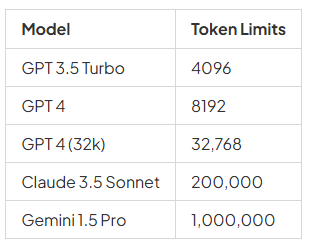

In [ ]:
#pip install llm-azure
#reference
#https://learn.microsoft.com/en-us/azure/ai-foundry/openai/how-to/responses?tabs=python-key
#https://learn.microsoft.com/en-us/azure/ai-foundry/openai/references/on-your-data?tabs=python

from dotenv import load_dotenv
load_dotenv()# which loads AZURE_OPENAI_API_KEY api key  from the environment
from llm_azure import AzureOpenAI

client = AzureOpenAI(azure_endpoint="",
    azure_deployment="",
    api_version="")

prompt="topics to teach in AI.output in  dictionary"
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant.give me the output alone"}, # role/persona
        {
            "role": "user",
            "content": prompt  #prompt->task by the user
            
        }
    ]
)
print(f'prompt :{prompt}')
print(f'output from LLM:{completion}')
# print(completion.usage.total_tokens)
# print(completion.usage.total_tokens)
# print(completion.usage.prompt_tokens)
# print(completion.usage.completion_tokens)
# print(completion.choices[0].message.content)

prompt :topics to teach in AI.output in  dictionary
output from LLM:ChatCompletion(id='chatcmpl-CdCYFljDBxHjIRe1CDztolUVHbGNo', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "1. Introduction to AI": ["Definition of AI", "History of AI", "Types of AI (Narrow, General, Superintelligence)"],\n    "2. Machine Learning": ["Supervised Learning", "Unsupervised Learning", "Reinforcement Learning", "Key Algorithms (e.g., Linear Regression, Decision Trees, Neural Networks)"],\n    "3. Deep Learning": ["Neural Networks Basics", "Convolutional Neural Networks (CNNs)", "Recurrent Neural Networks (RNNs)", "Transformers and Attention Mechanisms"],\n    "4. Natural Language Processing": ["Text Preprocessing", "Sentiment Analysis", "Chatbots", "Language Models (e.g., GPT, BERT)"],\n    "5. Computer Vision": ["Image Processing Basics", "Object Detection", "Image Classification", "Face Recognition"],\n    "6. AI Ethics and Responsible AI": ["B

In [33]:
print(completion.choices[0].message.content)

{
    "1. Introduction to AI": ["Definition of AI", "History of AI", "Types of AI (Narrow, General, Superintelligence)"],
    "2. Machine Learning": ["Supervised Learning", "Unsupervised Learning", "Reinforcement Learning", "Key Algorithms (e.g., Linear Regression, Decision Trees, Neural Networks)"],
    "3. Deep Learning": ["Neural Networks Basics", "Convolutional Neural Networks (CNNs)", "Recurrent Neural Networks (RNNs)", "Transformers and Attention Mechanisms"],
    "4. Natural Language Processing": ["Text Preprocessing", "Sentiment Analysis", "Chatbots", "Language Models (e.g., GPT, BERT)"],
    "5. Computer Vision": ["Image Processing Basics", "Object Detection", "Image Classification", "Face Recognition"],
    "6. AI Ethics and Responsible AI": ["Bias in AI", "Privacy Concerns", "Explainability and Transparency", "AI Governance"],
    "7. Robotics and AI Applications": ["AI in Robotics", "Autonomous Vehicles", "Healthcare AI Applications", "AI in Finance"],
    "8. Reinforcement

In [29]:
# from dotenv import load_dotenv
# import os
# from xai_grok import Grok
# from xai_grok.schemas import ChatRequest

# load_dotenv()

# # Initialize client
# client = Grok(api_key=os.getenv("XAI_API_KEY"))

# # Prepare messages
# messages = [
#     {"role": "system", "content": "You are a helpful assistant."},
#     {"role": "user", "content": "What’s the square of 25?"}
# ]

# # Call Grok
# response = client.chat_completions(
#     ChatRequest(messages=messages, model="grok-beta")
# )

# # Print response
# print(response.choices[0].message.content)


Langchain framework
chat models unify different apis
Easy switching between llms
Context management
Efficient Chaining
Scalability


In [34]:
from langchain_openai import AzureChatOpenAI
from dotenv import load_dotenv
load_dotenv()

llm = AzureChatOpenAI(
    azure_endpoint="https://dbt-poc.openai.azure.com/",
    azure_deployment="dbtpoc",
    api_version="2024-12-01-preview",
    model='GPT-4.1 nano',
    verbose=True
)

response = llm.invoke("Hello from LangChain + Azure!which model are you running")
print(response.content)

Hello! I am running on OpenAI's GPT-4 model, which has been integrated with LangChain to enhance its capabilities, such as chaining prompts, retrieval-augmented generation (RAG), and other advanced NLP workflows. If you're leveraging Azure for this, it's possible that you're interfacing with OpenAI's GPT models through Azure OpenAI Service. Is that correct?


In [35]:
print(response)

content="Hello! I am running on OpenAI's GPT-4 model, which has been integrated with LangChain to enhance its capabilities, such as chaining prompts, retrieval-augmented generation (RAG), and other advanced NLP workflows. If you're leveraging Azure for this, it's possible that you're interfacing with OpenAI's GPT models through Azure OpenAI Service. Is that correct?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 19, 'total_tokens': 95, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_b54fe76834', 'id': 'chatcmpl-CdCdeTGv9djFmPmskGsRKvaEvwojl', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filter

In [36]:
from langchain_core.messages import AIMessage,SystemMessage,HumanMessage
#SystemMessage->AI role and sets the context
#HumanMessage->represent user input or questions directed to the AI
#AIMessage->contains AI's response of previous message

message=[SystemMessage('You are a senior software engineer in data analytics company'),
         HumanMessage('Give 2 engaging AI topics to take session on as bullet points')]

print(type(message))
print(type(message[0]))
print(message[0].content)
response = llm.invoke(message)
print(response.content)
print(response)

<class 'list'>
<class 'langchain_core.messages.system.SystemMessage'>
You are a senior software engineer in data analytics company
- **Ethical AI and Responsible Machine Learning**: Dive deep into the importance of fairness, accountability, transparency, and bias mitigation in AI systems. Discuss real-world scenarios where ethical considerations play a major role and explore techniques to build trustworthy AI solutions.

- **Generative AI in Action: Transforming Creativity and Industries**: Explore the advancements in generative AI, such as GPT models, DALL-E, and others, showcasing their applications in media, marketing, content creation, and beyond. Highlight innovative use cases and discuss the future impact of generative AI across industries.
content='- **Ethical AI and Responsible Machine Learning**: Dive deep into the importance of fairness, accountability, transparency, and bias mitigation in AI systems. Discuss real-world scenarios where ethical considerations play a major role